# Without OnehotEncoding

# Import Dataset & Convert it into needed form

In [1]:
import pandas as pd
data = pd.read_excel('E:/Sales (2).xlsx')

In [2]:
data.head()

,Billing Date,Customer,Material Number,Material Group,Qty,UoM,Net Value in Doc Currency
0,2019-04-01,10000519,300216,10000001,960.0,KG,67200.00
1,2019-04-01,10002347,300204,10000001,82.0,KG,3717.06
2,2019-04-01,10002347,300236,10000001,4000.0,KG,146720.00
3,2019-04-01,10002347,300236,10000001,5000.0,KG,183400.00
4,2019-04-01,10002347,300236,10000001,5500.0,KG,201740.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152683 entries, 0 to 152682
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Billing Date               152683 non-null  datetime64[ns]
 1   Customer                   152683 non-null  int64         
 2   Material Number            152683 non-null  int64         
 3   Material Group             152683 non-null  int64         
 4   Qty                        152683 non-null  float64       
 5   UoM                        152683 non-null  object        
 6   Net Value in Doc Currency  152683 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 8.2+ MB


In [4]:
data.drop(['Customer' , 'Material Number' , 'Qty' , 'UoM'] , axis = 1 , inplace = True)

In [5]:
data.head()

,Billing Date,Material Group,Net Value in Doc Currency
0,2019-04-01,10000001,67200.00
1,2019-04-01,10000001,3717.06
2,2019-04-01,10000001,146720.00
3,2019-04-01,10000001,183400.00
4,2019-04-01,10000001,201740.00


In [6]:
data.columns = ['Date' , 'Material' , 'Sales']

In [7]:
data['Date'] = data['Date'].apply(lambda x: str(x)[:-9])  
data = data.groupby(['Date' , 'Material'])['Sales'].sum().reset_index()
print(len(data))
data.head()

3265


,Date,Material,Sales
0,2019-04-01,10000001,602777.06
1,2019-04-01,10000002,178063.20
2,2019-04-01,10000003,216684.00
3,2019-04-01,10000005,5151641.82
4,2019-04-01,10000007,2580483.11


In [8]:
lister = data['Material'].unique()
print(lister)

[10000001 10000002 10000003 10000005 10000007 10000008 10000009 10000010
 10000011 10000012 10000013 10000014 10000015 10000016 10000017 10000018
 10000019 10000020 10000021 10000022 10000023 10000024 10000025 10000027
 10000028 10000029 10000030 10000031 10000033 10000034 10000035 10000036
 10000037 10000039 10000040 10000026 10000004 10000038 10000032 10000006]


In [9]:
import numpy as np
for i in lister:
    data.insert(1 , str(i) , np.zeros(len(data)))

In [10]:
data['Material'].value_counts()

10000001    91
10000019    91
10000007    91
10000009    91
10000011    91
10000013    91
10000015    91
10000017    91
10000021    91
10000040    91
10000023    91
10000029    91
10000031    91
10000033    91
10000035    91
10000037    91
10000005    91
10000039    91
10000020    91
10000008    91
10000010    91
10000034    91
10000012    91
10000030    91
10000028    91
10000014    91
10000024    91
10000022    91
10000036    91
10000018    91
10000016    91
10000027    89
10000025    89
10000002    70
10000003    63
10000004    62
10000026    56
10000006     7
10000032     6
10000038     2
Name: Material, dtype: int64

In [11]:
data.head()

,Date,10000006,10000032,10000038,10000004,10000026,10000040,10000039,10000037,10000036,...,10000010,10000009,10000008,10000007,10000005,10000003,10000002,10000001,Material,Sales
0,2019-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000001,602777.06
1,2019-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000002,178063.20
2,2019-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000003,216684.00
3,2019-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000005,5151641.82
4,2019-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000007,2580483.11


In [12]:
# print(data[0'Material'])

print(str(data.loc[0 , 'Material']))
print(data.loc[0 , 'Sales'])

for i in range(len(data)):
    x = str(data.loc[i , 'Material'])
    data.loc[i , x] = data.loc[i , 'Sales']

10000001
602777.06


In [13]:
data.head()

,Date,10000006,10000032,10000038,10000004,10000026,10000040,10000039,10000037,10000036,...,10000010,10000009,10000008,10000007,10000005,10000003,10000002,10000001,Material,Sales
0,2019-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,602777.06,10000001,602777.06
1,2019-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,178063.2,0.00,10000002,178063.20
2,2019-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,216684.0,0.0,0.00,10000003,216684.00
3,2019-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,5151641.82,0.0,0.0,0.00,10000005,5151641.82
4,2019-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2580483.11,0.00,0.0,0.0,0.00,10000007,2580483.11


In [14]:
print(len(data))

3265


In [15]:
# To change datatype of lister which contains 
lister = list(map(str, lister))
lister.append('Sales')
print(lister)
# lister.remove('Sales')

['10000001', '10000002', '10000003', '10000005', '10000007', '10000008', '10000009', '10000010', '10000011', '10000012', '10000013', '10000014', '10000015', '10000016', '10000017', '10000018', '10000019', '10000020', '10000021', '10000022', '10000023', '10000024', '10000025', '10000027', '10000028', '10000029', '10000030', '10000031', '10000033', '10000034', '10000035', '10000036', '10000037', '10000039', '10000040', '10000026', '10000004', '10000038', '10000032', '10000006', 'Sales']


In [16]:
dm = data.groupby(['Date'])[lister].sum().reset_index()
dm.head()

,Date,10000001,10000002,10000003,10000005,10000007,10000008,10000009,10000010,10000011,...,10000036,10000037,10000039,10000040,10000026,10000004,10000038,10000032,10000006,Sales
0,2019-04-01,602777.06,178063.2,216684.0,5151641.82,2580483.11,2313731.83,726852.28,170344.82,77752.85,...,1036169.01,3025013.80,355094.46,233812.11,0.0,0.00,0.0,0.0,0.0,50648642.57
1,2019-04-02,274240.00,2291000.0,0.0,4483264.36,2084867.32,2318207.75,696174.58,180734.52,369328.01,...,996406.24,3078471.84,328726.67,358724.23,0.0,0.00,0.0,0.0,0.0,49429212.10
2,2019-04-03,1553522.60,0.0,107945.0,5750702.46,2585973.88,2909510.91,876963.24,438047.24,123922.59,...,1423093.67,3607853.01,343502.11,286247.69,49419.6,0.00,0.0,0.0,0.0,58869847.96
3,2019-04-04,3843352.00,25437.6,0.0,5840138.40,2979784.80,2733588.27,770636.24,251737.51,68695.09,...,1025335.74,3646552.61,669379.13,217040.86,138109.8,0.00,0.0,0.0,0.0,60938957.87
4,2019-04-05,4205908.00,1657290.0,212734.2,5600504.71,2366882.52,2602766.12,709088.41,630929.56,50410.65,...,1060735.39,3405518.35,284880.90,390380.06,149912.5,811534.88,0.0,0.0,0.0,60422859.61


Changes are saved in dm now in data.

# Making Windows

In [17]:
# import datetime
# # To get previous date
# print(datetime.date(*map(int, data.loc[0 , 'Date'].split('-'))) - datetime.timedelta(days=1))

In [17]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [18]:
lister.remove('Sales')
print(lister)

['10000001', '10000002', '10000003', '10000005', '10000007', '10000008', '10000009', '10000010', '10000011', '10000012', '10000013', '10000014', '10000015', '10000016', '10000017', '10000018', '10000019', '10000020', '10000021', '10000022', '10000023', '10000024', '10000025', '10000027', '10000028', '10000029', '10000030', '10000031', '10000033', '10000034', '10000035', '10000036', '10000037', '10000039', '10000040', '10000026', '10000004', '10000038', '10000032', '10000006']


In [19]:
def get_windowed_indexes(x , window_size , horizon):
    # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
    # print(f"Window step:\n {window_step}")

    # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
    
    return window_indexes

In [20]:
indexes = get_windowed_indexes(dm , WINDOW_SIZE , HORIZON)
print(indexes.shape)

(84, 8)


In [21]:
# window = []
# x = dm['10000001'][indexes[0]]
# x , y = x[:-1] , x[-1:]
# print(x)
# print(y.to_list())
# x = x.to_numpy()
# x = np.insert(x , 0 , int('10000001'))
# window.append(x.to_list())

full_windows = []
full_labels = []
for i in indexes:
    for j in range(len(lister)):
        win = dm[lister[j]][i]
        win , label = win[:-1] , win[-1:]
        win = win.to_numpy()
        window = np.insert(win , 0 , j + 1)
        full_windows.append(window.tolist())
        full_labels.append(label.to_list())
print(full_windows[:3])
print(full_labels[:3])

[[1.0, 602777.06, 274240.0, 1553522.6, 3843352.0, 4205908.0, 6881344.0, 6101444.0], [2.0, 178063.2, 2291000.0, 0.0, 25437.6, 1657290.0, 1840.0, 1800.0], [3.0, 216684.0, 0.0, 107945.0, 0.0, 212734.2, 0.0, 136696.8]]
[[1329717.0], [17000.0], [57740.25]]


In [22]:
import tensorflow as tf
max_windows_val = tf.math.reduce_max(full_windows)
min_windows_val = tf.math.reduce_min(full_windows)
range_windows = max_windows_val - min_windows_val

max_labels_val = tf.math.reduce_max(full_labels)
min_labels_val = tf.math.reduce_min(full_labels)
range_labels = max_labels_val - min_labels_val

In [23]:
full_windows = full_windows / range_windows
full_labels = full_labels / range_labels
print(full_windows[:3])
print(full_labels[:3])

tf.Tensor(
[[8.65389538e-08 5.21636941e-02 2.37324424e-02 1.34440213e-01
  3.32599670e-01 3.63974869e-01 5.95504284e-01 5.28012574e-01]
 [1.73077908e-07 1.54094035e-02 1.98260739e-01 0.00000000e+00
  2.20134319e-03 1.43420145e-01 1.59231669e-04 1.55770118e-04]
 [2.59616854e-07 1.87516063e-02 0.00000000e+00 9.34144761e-03
  0.00000000e+00 1.84097942e-02 0.00000000e+00 1.18295979e-02]], shape=(3, 8), dtype=float32)
tf.Tensor(
[[0.11507232]
 [0.00147116]
 [0.00499678]], shape=(3, 1), dtype=float32)


# Train-Test Splitting

In [25]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    split_size = len(windows) - (int(len(windows)*0.2)) # this will default to 80% train/20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [26]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2688, 672, 2688, 672)

In [49]:
print(train_windows[:5])
print(train_labels[:5])
print(test_windows[:5])
print(test_labels[:5])

tf.Tensor(
[[8.65389538e-08 5.21636941e-02 2.37324424e-02 1.34440213e-01
  3.32599670e-01 3.63974869e-01 5.95504284e-01 5.28012574e-01]
 [1.73077908e-07 1.54094035e-02 1.98260739e-01 0.00000000e+00
  2.20134319e-03 1.43420145e-01 1.59231669e-04 1.55770118e-04]
 [2.59616854e-07 1.87516063e-02 0.00000000e+00 9.34144761e-03
  0.00000000e+00 1.84097942e-02 0.00000000e+00 1.18295979e-02]
 [3.46155815e-07 4.45817709e-01 3.87977004e-01 4.97659773e-01
  5.05399466e-01 4.84661788e-01 4.37597930e-01 3.95666093e-01]
 [4.32694776e-07 2.23312289e-01 1.80422232e-01 2.23787487e-01
  2.57867455e-01 2.04827532e-01 2.04329327e-01 1.93576381e-01]], shape=(5, 8), dtype=float32)
tf.Tensor(
[[0.11507232]
 [0.00147116]
 [0.00499678]
 [0.40278473]
 [0.20170106]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[7.78850563e-07 8.26229341e-03 3.19374129e-02 1.26652289e-02
  1.67879183e-02 9.57365613e-03 4.64405725e-03 6.33838866e-03]
 [8.65389552e-07 3.54200423e-01 3.70057434e-01 2.50139892e-01
  3.77756685e-01 3.9423

# Wrong step
timesteps = data['Date'].to_numpy()

material = data['Material'].to_numpy()

# As in original dataset there are missing values we can't split data by this method
split_size = int(0.8 * len(material)) - 19

date_test , material_test = timesteps[split_size:] , material[split_size:]

len(date_test) , len(material_test)

In [27]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [28]:
def errors(y_true , y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    y_new = np.abs(y_true - y_pred)
    median = np.median(y_new)
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    y_new2 = np.zeros(len(y_new))
    for i in range(len(y_new)):
        if(y_true[i] != 0):
            y_new2[i] = y_new[i] / y_true[i] * 100
    median_per = np.median(y_new2)
    mean_per = np.median(y_new2)
    maxi = np.amax(y_new2)
    mini = np.amin(y_new2)
    
    return {'MAE: ' : mae.numpy() , 'MSE' : mse.numpy() , 'RMSE' : rmse.numpy() ,
            'MAPE' : mape.numpy() , 'Median' : median , '% error wrt median' : median_per , '% error wrt mean' : mean_per , 
           'Min Error' : mini , 'Max Error' : maxi}

In [29]:
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions

In [30]:
def upper_lower(y_true , y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    upper = y_pred + (y_pred* 15 / 100)
    lower = y_pred - (y_pred* 15 / 100)
    return upper , lower

In [31]:
# all activations are relu before changes and that gave best model
from tensorflow.keras import layers
p = len(full_windows)
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE + 1))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.GRU(int(p/2) , activation = 'relu')(x)
p = int(p/2)
while(p > 700):
    x = layers.Dense(int(p/2) , activation = 'relu')(x)
    p = int(p/2)
x = layers.Dense(700 , activation = 'relu')(x)
x = layers.Dense(350 , activation = 'relu')(x)
x = layers.Dense(275 , activation = 'relu')(x)
x = layers.Dense(100 , activation = 'relu')(x)

# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(10 , activation = 'relu')(x)
output = layers.Dense(HORIZON)(x)
model_2 = tf.keras.Model(inputs=inputs, outputs=output, name="model_2_lstm")

# Compile model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(lr = 0.001))

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
history_2 = model_2.fit(train_windows,
            train_labels,
            verbose = 0 , 
            epochs=300,
            batch_size= 64,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

C:\Users\Tirth\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets


In [32]:
# Load in best version of model 5 and evaluate on the test data
model_2 = tf.keras.models.load_model("model_experiments/model_2_lstm/")
model_2.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 0.0249


0.02491837739944458

In [33]:
# Make predictions with our LSTM model
model_2_preds = make_preds(model_2, test_windows)
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.00970678, 0.36802238, 0.09157203, 0.276368  , 0.04593821,
       0.01266641, 0.21247202, 0.2330694 , 0.2833428 , 0.17836115],
      dtype=float32)>

In [34]:
model_2_preds = tf.nn.relu(model_2_preds)

In [35]:
errors(y_true = tf.squeeze(test_labels) , y_pred = model_2_preds)

{'MAE: ': 0.024877874,
 'MSE': 0.0031678102,
 'RMSE': 0.056283303,
 'MAPE': 397198.44,
 'Median': 0.009936111,
 '% error wrt median': 13.214316368103027,
 '% error wrt mean': 13.214316368103027,
 'Min Error': 0.0,
 'Max Error': inf}

In [36]:
upper , lower = upper_lower(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_2_preds)
upper = upper * range_labels
lower = lower * range_labels
test_labels = test_labels * range_labels
model_2_preds = model_2_preds * range_labels

In [37]:
material = test_windows[: , 0] * range_windows
material = tf.math.round(material)
material = tf.cast(material , dtype = np.int32)
material = material + 10000000
material[:32]

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([10000009, 10000010, 10000011, 10000012, 10000013, 10000014,
       10000015, 10000016, 10000017, 10000018, 10000019, 10000020,
       10000021, 10000022, 10000023, 10000024, 10000025, 10000026,
       10000027, 10000028, 10000029, 10000030, 10000031, 10000032,
       10000033, 10000034, 10000035, 10000036, 10000037, 10000038,
       10000039, 10000040])>

In [38]:
date = (dm['Date'].to_numpy())[-16:]
date

array(['2019-06-15', '2019-06-16', '2019-06-17', '2019-06-18',
       '2019-06-19', '2019-06-20', '2019-06-21', '2019-06-22',
       '2019-06-23', '2019-06-24', '2019-06-25', '2019-06-26',
       '2019-06-27', '2019-06-28', '2019-06-29', '2019-06-30'],
      dtype=object)

In [40]:
dataframe = {'Date' : date , 'Material' : material , 'True Value' : tf.squeeze(test_labels) , 
             'Prediction' : model_2_preds , 'Upper' : upper , 'Lower' : lower}

In [ ]:
for i in range(len(df)):
    if(df.iloc[i].loc['Upper'] < df.iloc[i].loc['True Value']):
        df.loc[i , 'Outlier'] = 1
    
    elif(df.iloc[i].loc['Lower'] > df.iloc[i].loc['True Value']):
        df.loc[i , 'Outlier'] = -1
        
df.head()

In [ ]:
up = df.where(df['Outlier'] > 0)
up.dropna(subset = ["Outlier"] , inplace=True)
print(len(up))

In [ ]:
down = df.where(df['Outlier'] < 0)
down.dropna(subset = ["Outlier"], inplace=True)
print(len(down))

In [ ]:
# Write dataentries into excel sheets
with pd.ExcelWriter('E:\output.xlsx') as writer: 
    up.to_excel(writer , sheet_name='High_Values')
    down.to_excel(writer , sheet_name='Low_Values')

In [ ]:
up['Material'].value_counts()

In [ ]:
down['Material'].value_counts()

Here we can see that data is overfitted. 

So, weneed to try some strategies to avoid overfitting.

In [ ]:
# As previously we have multiplied test_labels with its range
# we need to divede it with it's range again
test_labels = test_labels / range_labels

In [48]:
print(test_windows[:5])
print(test_labels[:5])

tf.Tensor(
[[7.78850563e-07 8.26229341e-03 3.19374129e-02 1.26652289e-02
  1.67879183e-02 9.57365613e-03 4.64405725e-03 6.33838866e-03]
 [8.65389552e-07 3.54200423e-01 3.70057434e-01 2.50139892e-01
  3.77756685e-01 3.94237965e-01 3.24343741e-01 3.84173065e-01]
 [9.51928484e-07 8.33317935e-02 8.27712640e-02 7.54254088e-02
  7.91135281e-02 9.81708616e-02 8.36588144e-02 9.70783606e-02]
 [1.03846742e-06 2.96408921e-01 2.23607481e-01 1.53447092e-01
  2.51375914e-01 2.72732407e-01 2.80668467e-01 2.58520871e-01]
 [1.12500641e-06 4.18497883e-02 1.04492866e-01 9.61884856e-02
  2.02753581e-02 3.98769379e-02 8.23527798e-02 2.21494175e-02]], shape=(5, 8), dtype=float32)
tf.Tensor(
[[  88287. ]
 [4399137. ]
 [1007368.3]
 [3480343.2]
 [2186020.2]], shape=(5, 1), dtype=float32)


### Adding regularizer in each layer

In [94]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE + 1))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.GRU(512 , activation='elu',
                 kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = layers.Dense(512 , activation='elu',
                 kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = layers.Dense(512 , activation='elu',
                 kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = layers.Dense(512 , activation='elu',
                 kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = layers.Dense(100 , activation='elu',
                 kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)

output = layers.Dense(HORIZON)(x)
model_2 = tf.keras.Model(inputs=inputs, outputs=output, name="model_2_lstm")

# Compile model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(lr = 0.001))

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
history_2 = model_2.fit(train_windows,
            train_labels,
            verbose = 0 , 
            epochs = 300,
            batch_size= 64,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

C:\Users\Tirth\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiment

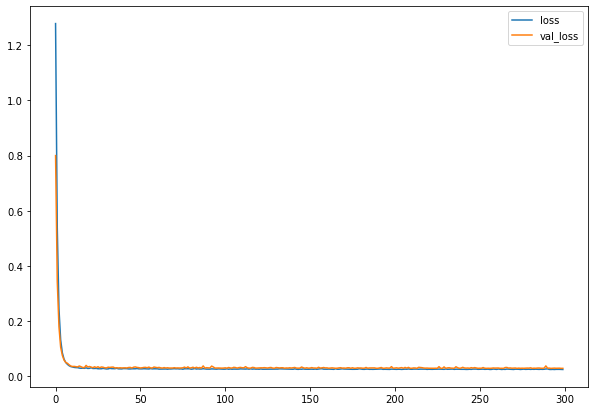

In [95]:
pd.DataFrame(history_2.history).plot(figsize = (10 , 7));

In [96]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_lstm/")
model_2.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 6ms/step - loss: 0.0289


0.02888774499297142

In [97]:
model_2_preds = make_preds(model_2, test_windows)
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.01111292, 0.36305052, 0.08682675, 0.26845378, 0.05457534,
       0.01300195, 0.19967978, 0.22478817, 0.2723693 , 0.16570638],
      dtype=float32)>

In [98]:
model_2_preds = tf.nn.relu(model_2_preds)

In [99]:
errors(y_true = tf.squeeze(test_labels) , y_pred = model_2_preds)

{'MAE: ': 0.02580685,
 'MSE': 0.0032227675,
 'RMSE': 0.056769423,
 'MAPE': 564569.7,
 'Median': 0.011313286,
 '% error wrt median': 13.68701171875,
 '% error wrt mean': 13.68701171875,
 'Min Error': 0.0,
 'Max Error': inf}

In [100]:
upper , lower = upper_lower(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_2_preds)
upper = upper * range_labels
lower = lower * range_labels
test_labels = test_labels * range_labels
model_2_preds = model_2_preds * range_labels

In [101]:
dataframe = {'Material' : material , 'True Value' : tf.squeeze(test_labels) , 
             'Prediction' : model_2_preds , 'Upper' : upper , 'Lower' : lower}

In [102]:
df = pd.DataFrame(dataframe)
df

,Material,True Value,Prediction,Upper,Lower
0,10000009,8.828700e+04,1.284152e+05,1.476775e+05,1.091530e+05
1,10000010,4.399137e+06,4.195226e+06,4.824510e+06,3.565943e+06
2,10000011,1.007368e+06,1.003326e+06,1.153824e+06,8.528268e+05
3,10000012,3.480343e+06,3.102115e+06,3.567432e+06,2.636798e+06
4,10000013,2.186020e+06,6.306448e+05,7.252415e+05,5.360481e+05
...,...,...,...,...,...
667,10000036,0.000000e+00,3.464374e+04,3.984030e+04,2.944718e+04
668,10000037,1.017006e+05,2.794149e+05,3.213271e+05,2.375026e+05
669,10000038,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
670,10000039,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [104]:
for i in range(len(df)):
    if(df.iloc[i].loc['Upper'] < df.iloc[i].loc['True Value']):
        df.loc[i , 'Outlier'] = 1
    
    elif(df.iloc[i].loc['Lower'] > df.iloc[i].loc['True Value']):
        df.loc[i , 'Outlier'] = -1
        
df.head()

,Material,True Value,Prediction,Upper,Lower,Outlier
0,10000009,8.828700e+04,1.284152e+05,1.476775e+05,1.091530e+05,-1.0
1,10000010,4.399137e+06,4.195226e+06,4.824510e+06,3.565943e+06,NaN
2,10000011,1.007368e+06,1.003326e+06,1.153824e+06,8.528268e+05,NaN
3,10000012,3.480343e+06,3.102115e+06,3.567432e+06,2.636798e+06,NaN
4,10000013,2.186020e+06,6.306448e+05,7.252415e+05,5.360481e+05,1.0


In [105]:
up = df.where(df['Outlier'] > 0)
up.dropna(subset = ["Outlier"] , inplace=True)
print(len(up))

166


In [106]:
down = df.where(df['Outlier'] < 0)
down.dropna(subset = ["Outlier"], inplace=True)
print(len(down))

152


The primary purpose of dropout is to minimize the effect of overfitting within a trained network. Dropout technique works by randomly reducing the number of interconnecting neurons within a neural network.

### Add dropout between each layer

In [67]:
tf.random.set_seed(42)

inputs = layers.Input(shape = (WINDOW_SIZE + 1))
x = layers.Lambda(lambda x: tf.expand_dims(x , axis = 1))(inputs)
x = layers.GRU(512 , activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512 , activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512 , activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512 , activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(100 , activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(HORIZON)(x)

model_3 = tf.keras.Model(inputs = inputs , outputs = outputs , name = 'Dropout_model')

model_3.compile(loss = 'mae' , optimizer = tf.keras.optimizers.Adam())

history_3 = model_3.fit(train_windows , train_labels , verbose = 0 , epochs = 100 , batch_size = 64 , 
                       validation_data = (test_windows , test_labels) , 
                       callbacks = [create_model_checkpoint(model_name = model_3.name)])

INFO:tensorflow:Assets written to: model_experiments\Dropout_model\assets
INFO:tensorflow:Assets written to: model_experiments\Dropout_model\assets
INFO:tensorflow:Assets written to: model_experiments\Dropout_model\assets
INFO:tensorflow:Assets written to: model_experiments\Dropout_model\assets
INFO:tensorflow:Assets written to: model_experiments\Dropout_model\assets
INFO:tensorflow:Assets written to: model_experiments\Dropout_model\assets
INFO:tensorflow:Assets written to: model_experiments\Dropout_model\assets
INFO:tensorflow:Assets written to: model_experiments\Dropout_model\assets


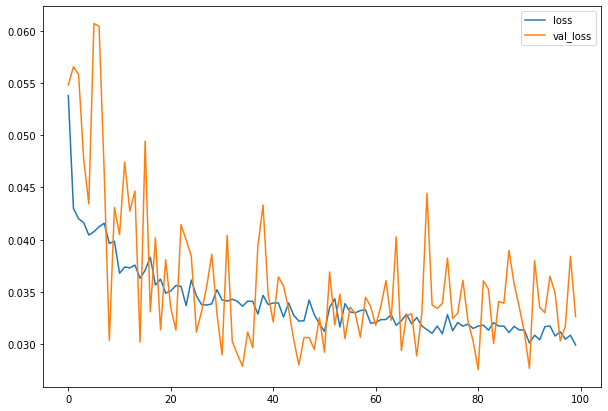

In [69]:
pd.DataFrame(history_3.history).plot(figsize = (10 , 7));

In [72]:
model_3 = tf.keras.models.load_model("model_experiments/Dropout_model/")
model_3.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 5ms/step - loss: 0.0276


0.02757982723414898

In [73]:
model_3_preds = make_preds(model_3, test_windows)
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.01051282, 0.39593348, 0.08672693, 0.26834285, 0.06660121,
       0.01178725, 0.2120874 , 0.23913313, 0.2688947 , 0.1661267 ],
      dtype=float32)>

In [86]:
model_3_preds = tf.nn.relu(model_3_preds)

In [87]:
errors(y_true = tf.squeeze(test_labels) , y_pred = model_3_preds)

{'MAE: ': 0.02757983,
 'MSE': 0.00367236,
 'RMSE': 0.0606,
 'MAPE': 767528.25,
 'Median': 0.011771992,
 '% error wrt median': 17.654139518737793,
 '% error wrt mean': 17.654139518737793,
 'Min Error': 0.012228407897055149,
 'Max Error': inf}

### Mix both the features

In [88]:
from tensorflow.keras import regularizers
model_4 = tf.keras.Sequential([
    layers.Input(shape = (WINDOW_SIZE + 1)) , 
    layers.Lambda(lambda x: tf.expand_dims(x , axis = 1)) , 
    layers.GRU(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='relu') , 
    layers.Dropout(0.5) , 
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1)
] , name = 'Combined_Model')

model_4.compile(loss = 'mae' , optimizer = tf.keras.optimizers.Adam())

history_4 = model_4.fit(train_windows , train_labels , verbose = 2 , epochs = 300 , batch_size = 64 , 
                       validation_data = (test_windows , test_labels) , 
                       callbacks = [create_model_checkpoint(model_name = model_4.name)])

Epoch 1/300
42/42 - 4s - loss: 0.2094 - val_loss: 0.1926
INFO:tensorflow:Assets written to: model_experiments\Combined_Model\assets
Epoch 2/300
42/42 - 1s - loss: 0.1439 - val_loss: 0.1262
INFO:tensorflow:Assets written to: model_experiments\Combined_Model\assets
Epoch 3/300
42/42 - 1s - loss: 0.1232 - val_loss: 0.1395
Epoch 4/300
42/42 - 1s - loss: 0.1016 - val_loss: 0.0874
INFO:tensorflow:Assets written to: model_experiments\Combined_Model\assets
Epoch 5/300
42/42 - 1s - loss: 0.0888 - val_loss: 0.0761
INFO:tensorflow:Assets written to: model_experiments\Combined_Model\assets
Epoch 6/300
42/42 - 1s - loss: 0.0812 - val_loss: 0.0872
Epoch 7/300
42/42 - 1s - loss: 0.0726 - val_loss: 0.0691
INFO:tensorflow:Assets written to: model_experiments\Combined_Model\assets
Epoch 8/300
42/42 - 1s - loss: 0.0696 - val_loss: 0.0756
Epoch 9/300
42/42 - 2s - loss: 0.0648 - val_loss: 0.0575
INFO:tensorflow:Assets written to: model_experiments\Combined_Model\assets
Epoch 10/300
42/42 - 1s - loss: 0.061

Epoch 114/300
42/42 - 1s - loss: 0.0361 - val_loss: 0.0332
Epoch 115/300
42/42 - 1s - loss: 0.0358 - val_loss: 0.0402
Epoch 116/300
42/42 - 1s - loss: 0.0364 - val_loss: 0.0341
Epoch 117/300
42/42 - 1s - loss: 0.0357 - val_loss: 0.0346
Epoch 118/300
42/42 - 1s - loss: 0.0356 - val_loss: 0.0329
Epoch 119/300
42/42 - 1s - loss: 0.0367 - val_loss: 0.0346
Epoch 120/300
42/42 - 1s - loss: 0.0357 - val_loss: 0.0326
Epoch 121/300
42/42 - 1s - loss: 0.0354 - val_loss: 0.0330
Epoch 122/300
42/42 - 1s - loss: 0.0357 - val_loss: 0.0344
Epoch 123/300
42/42 - 1s - loss: 0.0347 - val_loss: 0.0323
Epoch 124/300
42/42 - 1s - loss: 0.0362 - val_loss: 0.0347
Epoch 125/300
42/42 - 1s - loss: 0.0361 - val_loss: 0.0347
Epoch 126/300
42/42 - 1s - loss: 0.0355 - val_loss: 0.0354
Epoch 127/300
42/42 - 1s - loss: 0.0360 - val_loss: 0.0447
Epoch 128/300
42/42 - 1s - loss: 0.0368 - val_loss: 0.0455
Epoch 129/300
42/42 - 1s - loss: 0.0363 - val_loss: 0.0332
Epoch 130/300
42/42 - 1s - loss: 0.0360 - val_loss: 0.03

Epoch 253/300
42/42 - 1s - loss: 0.0370 - val_loss: 0.0348
Epoch 254/300
42/42 - 1s - loss: 0.0357 - val_loss: 0.0349
Epoch 255/300
42/42 - 1s - loss: 0.0364 - val_loss: 0.0390
Epoch 256/300
42/42 - 1s - loss: 0.0359 - val_loss: 0.0373
Epoch 257/300
42/42 - 1s - loss: 0.0351 - val_loss: 0.0369
Epoch 258/300
42/42 - 1s - loss: 0.0359 - val_loss: 0.0351
Epoch 259/300
42/42 - 1s - loss: 0.0351 - val_loss: 0.0350
Epoch 260/300
42/42 - 1s - loss: 0.0358 - val_loss: 0.0383
Epoch 261/300
42/42 - 1s - loss: 0.0360 - val_loss: 0.0354
Epoch 262/300
42/42 - 1s - loss: 0.0360 - val_loss: 0.0351
Epoch 263/300
42/42 - 1s - loss: 0.0358 - val_loss: 0.0341
Epoch 264/300
42/42 - 1s - loss: 0.0350 - val_loss: 0.0351
Epoch 265/300
42/42 - 1s - loss: 0.0356 - val_loss: 0.0397
Epoch 266/300
42/42 - 1s - loss: 0.0362 - val_loss: 0.0489
Epoch 267/300
42/42 - 1s - loss: 0.0360 - val_loss: 0.0337
Epoch 268/300
42/42 - 1s - loss: 0.0367 - val_loss: 0.0337
Epoch 269/300
42/42 - 1s - loss: 0.0365 - val_loss: 0.03

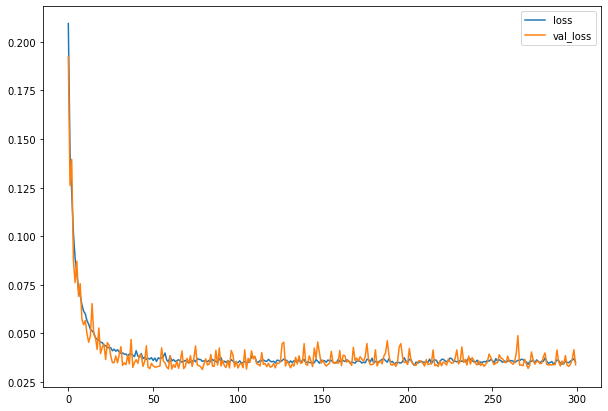

In [89]:
pd.DataFrame(history_4.history).plot(figsize = (10 , 7));

In [90]:
model_4 = tf.keras.models.load_model("model_experiments/Combined_Model/")
model_4.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 7ms/step - loss: 0.0314


0.0314209945499897

In [91]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.008689  , 0.36430922, 0.08929934, 0.262728  , 0.06315447,
       0.00892967, 0.21132377, 0.22965889, 0.27149633, 0.17983654],
      dtype=float32)>

In [92]:
model_4_preds = tf.nn.relu(model_4_preds)

In [93]:
errors(y_true = tf.squeeze(test_labels) , y_pred = model_4_preds)

{'MAE: ': 0.027359316,
 'MSE': 0.0033805568,
 'RMSE': 0.058142558,
 'MAPE': 921089.56,
 'Median': 0.011012331,
 '% error wrt median': 21.225260734558105,
 '% error wrt mean': 21.225260734558105,
 'Min Error': 0.09687896817922592,
 'Max Error': inf}

# Hypertune parameters in model

In [110]:
import keras_tuner as kt

In [147]:
def model_builder(hp):
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(shape = (WINDOW_SIZE + 1)))
    
    model.add(layers.Lambda(lambda x: tf.expand_dims(x , axis = 1)))
    # Now, we will try to automate number of nodes in first layer
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(layers.GRU(units = hp_units, kernel_regularizer=regularizers.l2(0.0001) , activation='relu'))
    
    model.add(layers.Dense(512 , activation='relu' , kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(layers.Dense(512 , activation='relu' , kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(layers.Dense(512 , activation='relu' , kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(layers.Dense(512 , activation='relu' , kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(layers.Dense(1))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss = 'mae' , metrics = ['mae'])

    return model

## Instantiate the tuner and perform hypertuning
Instantiate the tuner to perform the hypertuning. The Keras Tuner has four tuners available - RandomSearch, Hyperband, BayesianOptimization, and Sklearn. In this tutorial, you use the Hyperband tuner.

In [148]:
# Observe val_loss with
tuner = kt.Hyperband(model_builder , objective='val_loss' ,
                     max_epochs=100 , factor=3 ,
                     directory='model_experiments' , project_name='hypertune_model')

In [149]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss' , patience=5)

In [150]:
tuner.search(full_windows , full_labels , epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 44 Complete [00h 00m 03s]
val_loss: 0.054757289588451385

Best val_loss So Far: 0.03344989940524101
Total elapsed time: 00h 03m 07s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 160 and the optimal learning rate for the optimizer
is 0.01.



In [154]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(full_windows , full_labels , epochs=100 , validation_split=0.2)

val_acc_per_epoch = history.history['val_loss']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
84/84 [==============================] - 2s 12ms/step - loss: 0.2748 - mae: 0.1257 - val_loss: 0.1392 - val_mae: 0.1372
Epoch 2/100
84/84 [==============================] - 1s 9ms/step - loss: 0.1162 - mae: 0.1157 - val_loss: 0.1429 - val_mae: 0.1428
Epoch 3/100
84/84 [==============================] - 1s 9ms/step - loss: 0.1156 - mae: 0.1155 - val_loss: 0.1365 - val_mae: 0.1364
Epoch 4/100
84/84 [==============================] - 1s 9ms/step - loss: 0.1153 - mae: 0.1153 - val_loss: 0.1371 - val_mae: 0.1371
Epoch 5/100
84/84 [==============================] - 1s 9ms/step - loss: 0.1153 - mae: 0.1153 - val_loss: 0.1367 - val_mae: 0.1367
Epoch 6/100
84/84 [==============================] - 1s 9ms/step - loss: 0.1153 - mae: 0.1153 - val_loss: 0.1366 - val_mae: 0.1366
Epoch 7/100
84/84 [==============================] - 1s 9ms/step - loss: 0.1152 - mae: 0.1152 - val_loss: 0.1387 - val_mae: 0.1387
Epoch 8/100
84/84 [==============================] - 1s 9ms/step - loss: 0.1158 - 

Epoch 62/100
84/84 [==============================] - 1s 10ms/step - loss: 0.1153 - mae: 0.1153 - val_loss: 0.1363 - val_mae: 0.1363
Epoch 63/100
84/84 [==============================] - 1s 10ms/step - loss: 0.1151 - mae: 0.1151 - val_loss: 0.1369 - val_mae: 0.1369
Epoch 64/100
84/84 [==============================] - 1s 10ms/step - loss: 0.1151 - mae: 0.1151 - val_loss: 0.1390 - val_mae: 0.1390
Epoch 65/100
84/84 [==============================] - 1s 10ms/step - loss: 0.1154 - mae: 0.1154 - val_loss: 0.1392 - val_mae: 0.1392
Epoch 66/100
84/84 [==============================] - 1s 9ms/step - loss: 0.1153 - mae: 0.1153 - val_loss: 0.1385 - val_mae: 0.1385
Epoch 67/100
84/84 [==============================] - 1s 9ms/step - loss: 0.1151 - mae: 0.1151 - val_loss: 0.1362 - val_mae: 0.1362
Epoch 68/100
84/84 [==============================] - 1s 9ms/step - loss: 0.1156 - mae: 0.1156 - val_loss: 0.1390 - val_mae: 0.1389
Epoch 69/100
84/84 [==============================] - 1s 9ms/step - loss

### ---------------------------------------------------------THE END---------------------------------------------------------------

In [77]:
data.set_index('Date', inplace= True)

In [78]:
import numpy as np
timesteps = data.index.to_numpy()
sales = data["Sales"].to_numpy()
print(f'Median: {np.median(sales)}\n , Mean: {np.mean(sales)}\n , Minimum: {np.min(sales)}\n , Maximum: {np.max(sales)}')

timesteps[:10] , sales[:10]

Median: 917181.6700000002
 , Mean: 1735847.024404288
 , Minimum: 156.0
 , Maximum: 11555489.79


(array(['2019-04-01', '2019-04-01', '2019-04-01', '2019-04-01',
        '2019-04-01', '2019-04-01', '2019-04-01', '2019-04-01',
        '2019-04-01', '2019-04-01'], dtype=object),
 array([ 602777.06,  178063.2 ,  216684.  , 5151641.82, 2580483.11,
        2313731.83,  726852.28,  170344.82,   77752.85, 3472395.12]))

In [11]:
import matplotlib.pyplot as plt
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Price")
    if label:
        plt.legend(fontsize=14) # make label bigger
    plt.grid(False)

In [12]:
split_size = int(0.8 * len(sales))

X_train , y_train = timesteps[:split_size] , sales[:split_size]

X_test , y_test = timesteps[split_size:] , sales[split_size:]

len(X_train) , len(X_test) , len(y_train) , len(y_test)

(72, 19, 72, 19)

In [13]:
def errors(y_true , y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    y_new = np.abs(y_true - y_pred)
    median = np.median(y_new)
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    y_new2 = y_new / y_true * 100
    median_per = np.median(y_new2)
    mean_per = np.median(y_new2)
    
    return {'MAE: ' : mae.numpy() , 'MSE' : mse.numpy() , 'RMSE' : rmse.numpy() ,
            'MAPE' : mape.numpy() , 'Median' : median , '% error wrt median' : median_per , '% error wrt mean' : mean_per}

In [14]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [16]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
    return x[:, :-horizon], x[:, -horizon:]

# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [17]:
full_windows, full_labels = make_windows(sales , window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(84, 84)

In [18]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [19]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(67, 17, 67, 17)

In [20]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [21]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.GRU(128, activation="linear")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(10 , activation = 'linear')(x)
output = layers.Dense(HORIZON)(x)
model_2 = tf.keras.Model(inputs=inputs, outputs=output, name="model_2_lstm")

# Compile model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_2.fit(train_windows,
            train_labels,
            verbose = 0 , 
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiment

In [22]:
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions

In [23]:
def upper_lower(y_true , y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    upper = y_pred + (y_pred/10)
    lower = y_pred - (y_pred/10)
    return upper , lower

In [24]:
# Load in best version of model 5 and evaluate on the test data
model_2 = tf.keras.models.load_model("model_experiments/model_2_lstm/")
model_2.evaluate(test_windows, test_labels)

1/1 [==============================] - 0s 102ms/step - loss: 6253639.0000


6253639.0

In [25]:
# Make predictions with our LSTM model
model_2_preds = make_preds(model_2, test_windows)
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([69141720., 70794550., 59507880., 63672270., 71276150., 65553784.,
       72871870., 75132696., 74396696., 71553810.], dtype=float32)>

In [26]:
errors(y_true = tf.squeeze(test_labels) , y_pred = model_2_preds)

{'MAE: ': 6253639.0,
 'MSE': 53545705000000.0,
 'RMSE': 7317493.0,
 'MAPE': 8.486434,
 'Median': 6556560.0,
 '% error wrt median': 8.159292,
 '% error wrt mean': 8.159292}

In [29]:
upper , lower = upper_lower(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_2_preds)

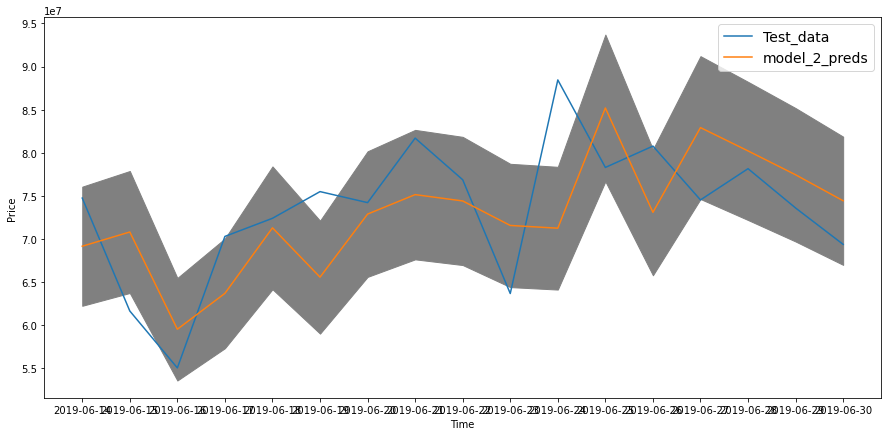

In [32]:
plt.figure(figsize=(15 , 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], format="-", label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, format="-", label="model_2_preds")
plt.fill_between(x = X_test[-len(test_windows):] , y1 = upper , y2 = lower , color='grey')

In [39]:
dataframe = {'Upper' : upper , 'Lower' : lower , 'Prediction' : model_2_preds ,
             'True Value' : tf.squeeze(test_labels) , 'Date' : X_test[-len(test_windows):]}

In [41]:
df = pd.DataFrame(dataframe)
df

,Upper,Lower,Prediction,True Value,Date
0,76055888.0,62227548.0,69141720.0,74731858.21,2019-06-14
1,77874008.0,63715096.0,70794552.0,61625204.60,2019-06-15
2,65458668.0,53557092.0,59507880.0,55018739.32,2019-06-16
3,70039496.0,57305044.0,63672272.0,70281703.91,2019-06-17
4,78403768.0,64148536.0,71276152.0,72384294.27,2019-06-18
5,72109160.0,58998404.0,65553784.0,75481911.90,2019-06-19
6,80159056.0,65584684.0,72871872.0,74203330.76,2019-06-20
7,82645968.0,67619424.0,75132696.0,81689255.73,2019-06-21
8,81836368.0,66957028.0,74396696.0,76857353.16,2019-06-22
9,78709192.0,64398428.0,71553808.0,63653219.38,2019-06-23


In [42]:
df.set_index('Date', inplace= True)

In [59]:
df

,Upper,Lower,Prediction,True Value,Outlier
Date,,,,,
2019-06-14,76055888.0,62227548.0,69141720.0,74731858.21,True
2019-06-15,77874008.0,63715096.0,70794552.0,61625204.60,True
2019-06-16,65458668.0,53557092.0,59507880.0,55018739.32,True
2019-06-17,70039496.0,57305044.0,63672272.0,70281703.91,True
2019-06-18,78403768.0,64148536.0,71276152.0,72384294.27,True
2019-06-19,72109160.0,58998404.0,65553784.0,75481911.90,True
2019-06-20,80159056.0,65584684.0,72871872.0,74203330.76,True
2019-06-21,82645968.0,67619424.0,75132696.0,81689255.73,True
2019-06-22,81836368.0,66957028.0,74396696.0,76857353.16,True


In [58]:
dummy = np.where((bool)(df['Upper'] >= df['Prediction']) or (bool)(df['Lower'] <= df['Prediction']))
dummy

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().